In [47]:
# a. IMPORTING NECESSARY PACKAGES ->
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np

In [48]:
# b. LOAD THE TRAINING AND TESTING DATA (MNIST) - >
data=pd.read_csv('C:\\Users\\anura\\Downloads\\mnist_784_csv.csv')
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [49]:
x=data.drop(['class'], axis=1)
y=data['class'].values

In [50]:
# Splitting it into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [51]:
x_train.shape

(49000, 784)

In [52]:
x_test.shape

(21000, 784)

In [53]:
x_train = x_train/255
x_test=x_test/255

In [60]:
# Check the shape of x_train
print(x_train.shape)

import math

# Assuming all images are square, calculate dimensions
flat_length = x_train.shape[1]
side_length = int(math.sqrt(flat_length))
print("Image Height:", side_length)
print("Image Width:", side_length)



(49000, 784)
Image Height: 28
Image Width: 28


In [61]:
# c. DEFINE THE NETWORK ARCHITECTURE USING KERAS ->
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(784,)),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 238,314 (930.91 KB)

 Trainable params: 238,314 (930.91 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
# d. TRAIN THE MODEL USING SGD ->
model.compile(optimizer="sgd",
            loss="sparse_categorical_crossentropy",
            metrics=['accuracy'])
history=model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6955 - loss: 1.0974
Epoch 2/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9197 - loss: 0.2806
Epoch 3/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9385 - loss: 0.2140
Epoch 4/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9500 - loss: 0.1758
Epoch 5/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9588 - loss: 0.1448
Epoch 6/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9628 - loss: 0.1282
Epoch 7/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9679 - loss: 0.1120
Epoch 8/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9715 - loss: 0.0986
Epoch 9/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9758 - loss: 0.0863
Epoch 10/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9780 - loss: 0.0757


In [63]:
# e. EVALUATE THE NETWORK
test_loss, test_acc=model.evaluate(x_test,y_test)
print("Loss-%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9672 - loss: 0.1093
Loss-0.107
Accuracy=0.968


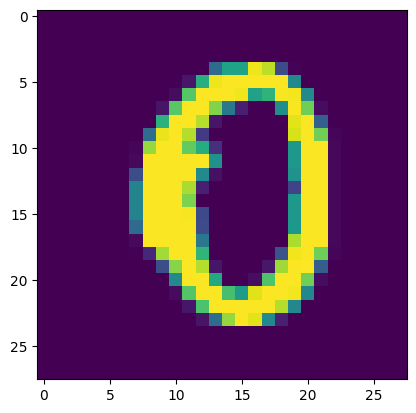

657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
8


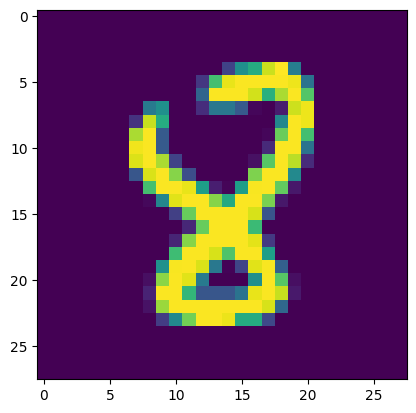

In [64]:
x_test_img = x_test.to_numpy().reshape(x_test.shape[0],28,28)
plt.imshow(x_test_img[0])
plt.show()
n=random.randint(0,500)
plt.imshow(x_test_img[n])
predicted_value = model.predict(x_test)
print(np.argmax(predicted_value[n]))

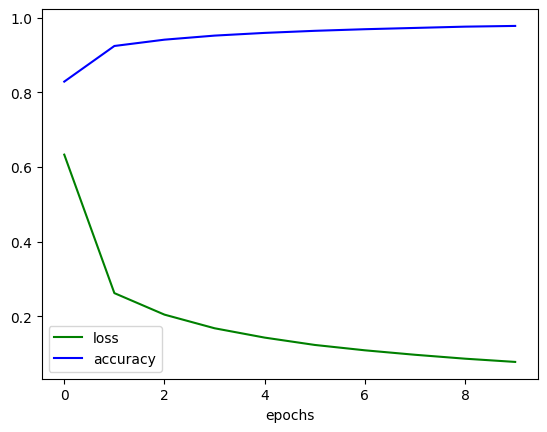

In [65]:
 # PLOT THE TRAINING LOSS AND ACCURACY ->
plt.plot(history.history['loss'],label='loss',color='g')
plt.plot(history.history['accuracy'],label='accuracy',color='b')
plt.xlabel('epochs')
plt.legend()
plt.show()